In [3]:
pip -V

pip 24.0 from /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip (python 3.12)
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 22.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install tensorflow scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 MB 8.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 22.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 22.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 26.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 18.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.6/393.6 kB 18.8 MB/s eta 0:00:00

In [38]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [39]:
data_dir = '/Users/rajat74/Downloads/data/food-101-tiny'
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')

In [40]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                img_path = os.path.join(subdir, file)
                image = Image.open(img_path)
                image = image.resize((128, 128))  # Resize the images to a common size
                images.append(np.array(image))
                labels.append(os.path.basename(subdir))
    return np.array(images), np.array(labels)

In [53]:
train_images, train_labels = load_images_from_folder(train_dir)
valid_images, valid_labels = load_images_from_folder(valid_dir)
print(f"Loaded {len(train_images)} training images with {len(set(train_labels))} classes.")
print(f"Loaded {len(valid_images)} validation images with {len(set(valid_labels))} classes.")

Loaded 1500 training images with 10 classes.
Loaded 500 validation images with 10 classes.


In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for training and validation
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
valid_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=valid_generator)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - accuracy: 0.1471 - loss: 6.0406 - val_accuracy: 0.2140 - val_loss: 2.1115
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 177ms/step - accuracy: 0.3324 - loss: 1.9926 - val_accuracy: 0.3000 - val_loss: 1.9675
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - accuracy: 0.4950 - loss: 1.5804 - val_accuracy: 0.3360 - val_loss: 1.8990
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 220ms/step - accuracy: 0.6899 - loss: 1.1569 - val_accuracy: 0.3540 - val_loss: 1.8398
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 0.8505 - loss: 0.7224 - val_accuracy: 0.3120 - val_loss: 2.0604
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 188ms/step - accuracy: 0.9349 - loss: 0.4130 - val_accuracy: 0.3280 - val_loss: 2.0778
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9780 - loss: 0.2007 - val_accuracy: 0.3260 - val_loss: 2.1872
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 181ms/step - accuracy: 0.9928 - loss: 0.1268 - val_accuracy: 0.3180 - 

Epoch 1/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 200ms/step - accuracy: 1.0000 - loss: 0.0249 - val_accuracy: 0.3160 - val_loss: 2.5183
Epoch 2/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 193ms/step - accuracy: 1.0000 - loss: 0.0163 - val_accuracy: 0.3140 - val_loss: 2.5903
Epoch 3/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.3260 - val_loss: 2.6343
Epoch 4/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.3240 - val_loss: 2.6658
Epoch 5/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 185ms/step - accuracy: 1.0000 - loss: 0.0075 - val_accuracy: 0.3240 - val_loss: 2.7289
Epoch 6/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.3220 - val_loss: 2.7887
Epoch 7/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 1.0000 - loss: 0.0057 - val_accuracy: 0.3380 - val_loss: 2.8217
Epoch 8/10
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 187ms/step - accuracy: 1.0000 - loss: 0.0046 - val_accuracy: 

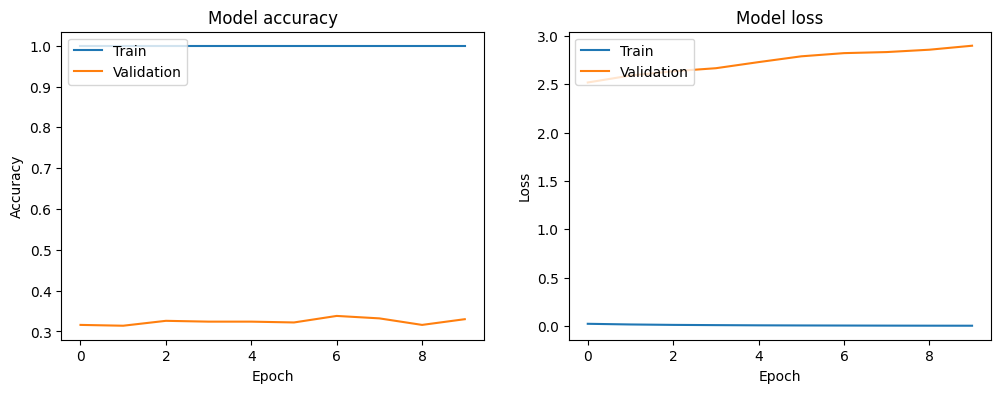

In [46]:
# Train the model and save the training history
history = model.fit(train_generator, epochs=10, validation_data=valid_generator)

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [47]:
# Save the model
model.save('food_classification_model.h5')

# Load the model
model = tf.keras.models.load_model('food_classification_model.h5')


In [51]:
# Load a new image
new_image_path = '/Users/rajat74/Downloads/icecream.jpeg'
new_image = Image.open(new_image_path)
new_image = new_image.resize((128, 128))
new_image = np.array(new_image) / 255.0  # Normalize to [0, 1]
new_image = np.expand_dims(new_image, axis=0)  # Add batch dimension

# Make a prediction
predictions = model.predict(new_image)
predicted_class = np.argmax(predictions, axis=1)
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted class: [0]
